## Name of the Dataset- Automotive Churn Prediction 

In [412]:
# 1.0 Call libraries
# 1.1 Data manipulation libraries
import numpy as np
import pandas as pd

# 1.2 sklearn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# 1.3 For plotting NN model
#  conda install -c anaconda graphviz
#  conda install -c anaconda pydot
# from skimage import io
# import pydot

# 1.4 Keras model components
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, concatenate, GRU, Embedding, Flatten
from tensorflow.keras.layers import Conv1D, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

# 1.4.1 For text (word) to integer transformation
from tensorflow.keras.preprocessing.text import Tokenizer

# 1.4.2 For making all integer sequences of equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1.4.3 Import backend to invoke tensorflow commands to manipulate tensors
from tensorflow.keras import backend as K

# 1.5 Plotting libraries
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline 

# 1.6 Misc
import math, time, os,gc

In [413]:
# Check tensorflow version:

tf.__version__    # 2.9.2

'2.9.2'

In [414]:
# Print all outputs from a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [415]:
# Drive mounting
from google.colab import drive
drive.mount('/gdrive')  

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [416]:
# Set path to train and test data
path = "/content/drive/MyDrive/Colab Notebooks/automotive churn prediction"

In [417]:
# 3.0 Read datasets
# %%time


print("---Loading data---")

train = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/automotive churn prediction/automotive_train.csv")

# 3.0.1
test = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/automotive churn prediction/automotive_test.csv")

print("---finished reading---")

---Loading data---
---finished reading---


In [418]:
# Viewing columns and rows of the test and train dataset (first 2 rows)
train.head(2)
test.head(2)

,Unnamed: 0,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_score,content,summary,sentiment
0,2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,Ordered two sets. Jacked up car and used thes...,Not stable enough for me to crawl under.,0
1,3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5,Very good product worked great,One Star,0


,Unnamed: 0,Unnamed: 0.1,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_score,sentiment,content,summary,sentiments
0,5,5,fffe43004900440035003700330030003600,Evelyne Kinch,17,M,NBV1O8W,Town,Basic Membership,2016-12-04,Yes,CID53746,Without Offers,?,Mobile_Data,08:45:54,-999,31.02,9948.54,16.0,577.83,Yes,No,Yes,No Information Available,Poor Product Quality,5,2,I just want to say that most Meguiar's product...,half of the product leaked before opening...di...,0
1,9,9,fffe4300490044003500320033003500,Franklin Lurry,22,M,C3B77NU,Town,No Membership,2015-10-14,Yes,CID60228,Credit/Debit Card Offers,Desktop,Fiber_Optic,10:44:01,4,30.25,19363.60,Error,528.66,Yes,No,No,Not Applicable,Poor Website,5,1,This item is misrepresented. Meguiar's no lon...,Meguiar's Gold Class Clear Coat Wax,0


In [419]:
# Viewing columns and rows of the test and train dataset (last 2 rows)
train.tail(2)
test.head(2)

,Unnamed: 0,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_score,content,summary,sentiment
36986,289062,fffe43004900440034003900300036003500,Marlena Chastain,27,M,8X0LUUS,Town,Platinum Membership,2015-09-07,Yes,CID15800,Credit/Debit Card Offers,Desktop,Mobile_Data,05:29:19,13,135.83,8225.68,16.0,748.570000,Yes,No,No,Not Applicable,No reason specified,3,"This is an excellent product! It's a car ""sham...","Perfect car ""shampoo & CONDITIONER""!",1
36987,289063,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:50:03,15,482.61,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3,Works great! Helps keep the Jeep clean!,Five Stars,1


,Unnamed: 0,Unnamed: 0.1,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_score,sentiment,content,summary,sentiments
0,5,5,fffe43004900440035003700330030003600,Evelyne Kinch,17,M,NBV1O8W,Town,Basic Membership,2016-12-04,Yes,CID53746,Without Offers,?,Mobile_Data,08:45:54,-999,31.02,9948.54,16.0,577.83,Yes,No,Yes,No Information Available,Poor Product Quality,5,2,I just want to say that most Meguiar's product...,half of the product leaked before opening...di...,0
1,9,9,fffe4300490044003500320033003500,Franklin Lurry,22,M,C3B77NU,Town,No Membership,2015-10-14,Yes,CID60228,Credit/Debit Card Offers,Desktop,Fiber_Optic,10:44:01,4,30.25,19363.60,Error,528.66,Yes,No,No,Not Applicable,Poor Website,5,1,This item is misrepresented. Meguiar's no lon...,Meguiar's Gold Class Clear Coat Wax,0


In [420]:
#prints information about the train DataFrame

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36988 entries, 0 to 36987
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36988 non-null  int64  
 1   customer_id                   36988 non-null  object 
 2   Name                          36988 non-null  object 
 3   age                           36988 non-null  int64  
 4   gender                        36988 non-null  object 
 5   security_no                   36988 non-null  object 
 6   region_category               31562 non-null  object 
 7   membership_category           36988 non-null  object 
 8   joining_date                  36988 non-null  object 
 9   joined_through_referral       36988 non-null  object 
 10  referral_id                   36988 non-null  object 
 11  preferred_offer_types         36700 non-null  object 
 12  medium_of_operation           36988 non-null  object 
 13  i

In [421]:
#prints information about the test DataFrame

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19915 entries, 0 to 19914
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19915 non-null  int64  
 1   Unnamed: 0.1                  19915 non-null  int64  
 2   customer_id                   19915 non-null  object 
 3   Name                          19915 non-null  object 
 4   age                           19915 non-null  int64  
 5   gender                        19915 non-null  object 
 6   security_no                   19915 non-null  object 
 7   region_category               16967 non-null  object 
 8   membership_category           19915 non-null  object 
 9   joining_date                  19915 non-null  object 
 10  joined_through_referral       19915 non-null  object 
 11  referral_id                   19915 non-null  object 
 12  preferred_offer_types         19756 non-null  object 
 13  m

In [422]:
#returns description of the data in the DataFrame

train.describe()

test.describe()

,Unnamed: 0,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_score,sentiment
count,36988.000000,36988.000000,36988.00000,36988.000000,36988.000000,33546.000000,36988.000000,36988.000000
mean,34284.255326,37.116957,-41.92138,243.479301,29271.780719,686.884840,3.463421,0.785011
std,80161.301833,15.867336,228.83158,398.309191,19445.304446,194.071770,1.409651,0.410820
min,0.000000,10.000000,-999.00000,-2814.109110,800.460000,-760.661236,-1.000000,0.000000
25%,4132.000000,23.000000,8.00000,60.075000,14178.045000,616.127500,3.000000,1.000000
50%,8443.500000,37.000000,12.00000,161.765000,27554.485000,697.625000,4.000000,1.000000
75%,15435.250000,51.000000,16.00000,356.530000,40858.222500,763.950000,5.000000,1.000000
max,289063.000000,64.000000,26.00000,3235.578521,99914.050000,2069.069761,5.000000,1.000000


,Unnamed: 0,Unnamed: 0.1,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_score,sentiment,sentiments
count,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,19915.000000,17952.000000,19915.000000,19915.000000,19915.000000
mean,30639.035300,9959.610143,36.885815,-39.226513,244.143891,29317.282449,685.959734,3.621843,4.095004,0.762591
std,85394.820438,5750.288683,15.917345,223.295725,403.942806,19509.233395,192.171504,1.190483,1.374605,0.425506
min,0.000000,0.000000,10.000000,-999.000000,-2180.780796,803.710000,-465.289977,1.000000,1.000000,0.000000
25%,2114.500000,4979.500000,23.000000,8.000000,59.360000,14232.645000,615.725000,3.000000,4.000000,1.000000
50%,4401.000000,9959.000000,37.000000,12.000000,161.240000,27563.530000,698.110000,4.000000,5.000000,1.000000
75%,8097.500000,14939.500000,51.000000,16.000000,354.195000,40969.400000,764.730000,5.000000,5.000000,1.000000
max,313033.000000,19918.000000,64.000000,26.000000,3350.060000,99995.030000,2019.671602,5.000000,5.000000,1.000000


In [423]:
# to find out the data types of the various columns in train dataset

train.dtypes


Unnamed: 0                        int64
customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object


In [424]:
# to find out the data types of the various columns in test dataset

test.dtypes

Unnamed: 0                        int64
Unnamed: 0.1                      int64
customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object


In [425]:
#number of rows and columns in train dataset

train.shape

(36988, 29)

In [426]:
#number of rows and columns in test dataset

test.shape

(19915, 31)

In [427]:
# the column names in the train dataset

train.columns

Index(['Unnamed: 0', 'customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_score', 'content', 'summary', 'sentiment'],
      dtype='object')

In [428]:
# the column names in the test dataset

test.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'customer_id', 'Name', 'age', 'gender',
       'security_no', 'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_score', 'sentiment', 'content', 'summary',
       'sentiments'],
      dtype='object')

In [429]:
import seaborn as sns

In [430]:
# to check if there are any null values in the train dataset
train.isnull().sum()

Unnamed: 0                         0
customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5426
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3442
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_score                        0
content                            0
s

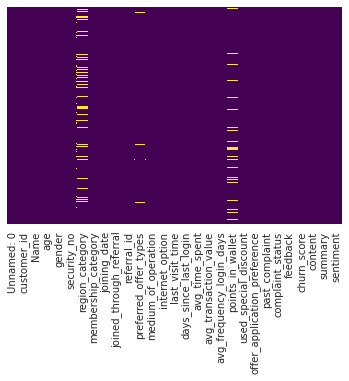

In [431]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='viridis')
#to visually show the null values

In [432]:
# to check if there are any null values in the test dataset

test.isnull().sum()



Unnamed: 0                         0
Unnamed: 0.1                       0
customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 2948
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            159
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                1963
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_score                        0
s

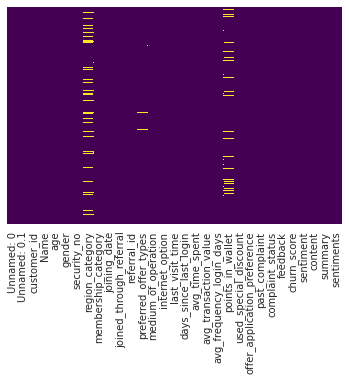

In [433]:
sns.heatmap(test.isnull(), yticklabels=False,cbar=False, cmap='viridis')
#to visually show the null values

In [434]:
#to get a sample of the values in the following columns in test dataset
test['points_in_wallet']   
print("-----\n")
test['preferred_offer_types']      
print("-----\n")      
test['region_category']

0         577.830000
1         528.660000
2         613.790000
3         520.360000
4         523.410000
            ...     
19910     798.880000
19911     773.850000
19912     796.360000
19913     708.120000
19914    1193.689813
Name: points_in_wallet, Length: 19915, dtype: float64

-----



0                  Without Offers
1        Credit/Debit Card Offers
2        Credit/Debit Card Offers
3                  Without Offers
4        Credit/Debit Card Offers
                   ...           
19910    Credit/Debit Card Offers
19911    Credit/Debit Card Offers
19912       Gift Vouchers/Coupons
19913              Without Offers
19914       Gift Vouchers/Coupons
Name: preferred_offer_types, Length: 19915, dtype: object

-----



0           Town
1           Town
2        Village
3           Town
4           City
          ...   
19910       Town
19911       Town
19912       City
19913        NaN
19914       Town
Name: region_category, Length: 19915, dtype: object

In [435]:
#to get a sample of the values in the following columns in train dataset

train['points_in_wallet']   
print("-----\n")
train['preferred_offer_types']      
print("-----\n")      
train['region_category']

0         500.690000
1         567.660000
2         663.060000
3         568.080000
4         699.700000
            ...     
36983    1224.393346
36984    1011.270354
36985     703.030000
36986     748.570000
36987     197.264414
Name: points_in_wallet, Length: 36988, dtype: float64

-----



0           Gift Vouchers/Coupons
1           Gift Vouchers/Coupons
2        Credit/Debit Card Offers
3        Credit/Debit Card Offers
4           Gift Vouchers/Coupons
                   ...           
36983    Credit/Debit Card Offers
36984    Credit/Debit Card Offers
36985       Gift Vouchers/Coupons
36986    Credit/Debit Card Offers
36987       Gift Vouchers/Coupons
Name: preferred_offer_types, Length: 36988, dtype: object

-----



0           Town
1           City
2           City
3            NaN
4        Village
          ...   
36983       Town
36984       City
36985        NaN
36986       Town
36987    Village
Name: region_category, Length: 36988, dtype: object

In [436]:
# to view the column names in the test dataset
test.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'customer_id', 'Name', 'age', 'gender',
       'security_no', 'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_score', 'sentiment', 'content', 'summary',
       'sentiments'],
      dtype='object')

In [437]:
# Dropping the irrelevant columns in test dataset

test = test.drop('Unnamed: 0.1', axis=1)
test = test.drop('preferred_offer_types', axis=1)
test = test.drop('sentiments', axis=1)
test = test.drop('medium_of_operation', axis=1)
test = test.drop('internet_option', axis=1)
test = test.drop('days_since_last_login', axis=1)
test = test.drop('avg_time_spent', axis=1)
test = test.drop('avg_frequency_login_days', axis=1)
test = test.drop('offer_application_preference', axis=1)
test = test.drop('joined_through_referral', axis=1)
test = test.drop('referral_id', axis=1)
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('customer_id', axis=1)
test = test.drop('joining_date', axis=1)
test = test.drop('last_visit_time', axis=1)




In [438]:
test.columns

Index(['Name', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'avg_transaction_value', 'points_in_wallet',
       'used_special_discount', 'past_complaint', 'complaint_status',
       'feedback', 'churn_score', 'sentiment', 'content', 'summary'],
      dtype='object')

In [439]:
test.shape
train.shape

(19915, 16)

(36988, 29)

In [440]:
# Dropping the irrelevant columns in test dataset

train = train.drop('preferred_offer_types', axis=1)
train = train.drop('medium_of_operation', axis=1)
train = train.drop('internet_option', axis=1)
train = train.drop('days_since_last_login', axis=1)
train = train.drop('avg_time_spent', axis=1)
train = train.drop('avg_frequency_login_days', axis=1)
train = train.drop('offer_application_preference', axis=1)
train = train.drop('joined_through_referral', axis=1)
train = train.drop('referral_id', axis=1)
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('customer_id', axis=1)
train = train.drop('joining_date', axis=1)
train = train.drop('last_visit_time', axis=1)


NOTE- We need to take care of the missing values in the these two columns in both test and train dataset, i.e. region category and points_in_wallet

In [441]:
#Filling missing values in test dataset-
def fill_missing(test):
    test["region_category"].fillna(value="unknown", inplace=True)
    test["points_in_wallet"].fillna(value="0", inplace=True)
    return (test)

In [442]:
test = fill_missing(test)

In [443]:
# checking if missing values have been added or not
test.isnull().sum()

Name                     0
age                      0
gender                   0
security_no              0
region_category          0
membership_category      0
avg_transaction_value    0
points_in_wallet         0
used_special_discount    0
past_complaint           0
complaint_status         0
feedback                 0
churn_score              0
sentiment                0
content                  0
summary                  0
dtype: int64

In [444]:
#Filling missing values in train dataset-
def fill_missing(train):
    train["region_category"].fillna(value="unknown", inplace=True)
    train["points_in_wallet"].fillna(value="0", inplace=True)
    return (train)

In [445]:
train = fill_missing(train)

In [446]:
# checking if missing values have been added or not

train.isnull().sum()

Name                     0
age                      0
gender                   0
security_no              0
region_category          0
membership_category      0
avg_transaction_value    0
points_in_wallet         0
used_special_discount    0
past_complaint           0
complaint_status         0
feedback                 0
churn_score              0
content                  0
summary                  0
sentiment                0
dtype: int64

In [447]:
train.columns

Index(['Name', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'avg_transaction_value', 'points_in_wallet',
       'used_special_discount', 'past_complaint', 'complaint_status',
       'feedback', 'churn_score', 'content', 'summary', 'sentiment'],
      dtype='object')

### Data Visualization

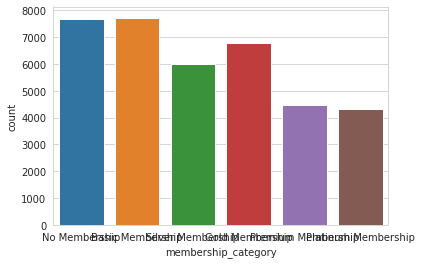

In [448]:
# The membership category for the members
sns.countplot(x='membership_category',data=train)
sns.set_style("whitegrid")

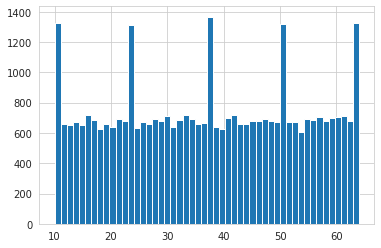

In [449]:
# Histogram depicting the ages of the members

train['age'].hist(bins=50)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


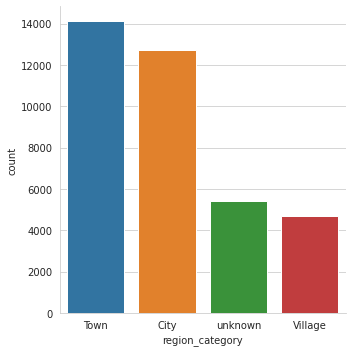

In [450]:
# Categoric plot for the Regions from where member belong
sns.catplot('region_category',data=train,kind='count')


### LABEL ENCODING of the categoric columns


In [451]:
# Merge 1D category_name data of train & test into one array.

gender_array = np.hstack([train.gender.values, test.gender .values])
membership_category = np.hstack([train.membership_category.values, test.membership_category.values])
used_special_discount_array = np.hstack([train.used_special_discount.values, test.used_special_discount.values])
past_complaint_array = np.hstack([train.past_complaint.values, test.past_complaint.values])
complaint_status_array = np.hstack([train.complaint_status.values, test.complaint_status.values])
feedback_array = np.hstack([train.feedback.values, test.feedback.values])

In [452]:
# Label encoding each category

# Instantiate object for category name transformation:

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()


# Training :

le1.fit(gender_array)
le2.fit(membership_category)
le3.fit(used_special_discount_array)
le4.fit(past_complaint_array)
le5.fit(complaint_status_array)
le6.fit(feedback_array)


LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [453]:
train.gender = le1.transform(train.gender.values)
test.gender = le1.transform(test.gender.values)

In [454]:
train.membership_category = le2.transform(train.membership_category.values)
test.membership_category = le2.transform(test.membership_category.values)

In [455]:
train.used_special_discount = le3.transform(train.used_special_discount.values)
test.used_special_discount = le3.transform(test.used_special_discount.values)

In [456]:
train.past_complaint = le4.transform(train.past_complaint.values)
test.past_complaint = le4.transform(test.past_complaint.values)

In [457]:
train.complaint_status = le5.transform(train.complaint_status.values)
test.complaint_status = le5.transform(test.complaint_status.values)

In [458]:
train.feedback = le6.transform(train.feedback.values)
test.feedback = le6.transform(test.feedback.values)

In [459]:
# Classes:
le1.classes_
len(le1.classes_)
print("\n======\n")
le2.classes_
len(le2.classes_)
print("\n======\n")
le3.classes_
len(le3.classes_)
print("\n======\n")
le4.classes_
len(le4.classes_)
print("\n======\n")
le5.classes_
len(le5.classes_)
print("\n======\n")
le6.classes_
len(le6.classes_)
print("\n======\n")


array(['F', 'M', 'Unknown'], dtype=object)

3

array(['Basic Membership', 'Gold Membership', 'No Membership',
       'Platinum Membership', 'Premium Membership', 'Silver Membership'],
      dtype=object)

6

array(['No', 'Yes'], dtype=object)

2

array(['No', 'Yes'], dtype=object)

2

array(['No Information Available', 'Not Applicable', 'Solved',
       'Solved in Follow-up', 'Unsolved'], dtype=object)

5

array(['No reason specified', 'Poor Customer Service',
       'Poor Product Quality', 'Poor Website', 'Products always in Stock',
       'Quality Customer Care', 'Reasonable Price', 'Too many ads',
       'User Friendly Website'], dtype=object)

9

In [460]:
# Length:

MAX_CATEGORY_VOC = len(le1.classes_)
print("\n======\n")
f"Mac vocabulary size for category: {MAX_CATEGORY_VOC}"

MAX_CATEGORY_VOC = len(le2.classes_)
print("\n======\n")
f"Mac vocabulary size for category: {MAX_CATEGORY_VOC}"

MAX_CATEGORY_VOC = len(le3.classes_)
print("\n======\n")
f"Mac vocabulary size for category: {MAX_CATEGORY_VOC}"

MAX_CATEGORY_VOC = len(le4.classes_)
print("\n======\n")
f"Mac vocabulary size for category: {MAX_CATEGORY_VOC}"

MAX_CATEGORY_VOC = len(le5.classes_)
print("\n======\n")
f"Mac vocabulary size for category: {MAX_CATEGORY_VOC}"

MAX_CATEGORY_VOC = len(le6.classes_)
print("\n======\n")
f"Mac vocabulary size for category: {MAX_CATEGORY_VOC}"






'Mac vocabulary size for category: 3'

'Mac vocabulary size for category: 6'

'Mac vocabulary size for category: 2'

'Mac vocabulary size for category: 2'

'Mac vocabulary size for category: 5'

'Mac vocabulary size for category: 9'

## Data after above transformations


In [461]:
# Looking at transformed data:

train.head(3)
test.head(3)

,Name,age,gender,security_no,region_category,membership_category,avg_transaction_value,points_in_wallet,used_special_discount,past_complaint,complaint_status,feedback,churn_score,content,summary,sentiment
0,Merideth Mcmeen,44,0,1F2TCL3,Town,2,21027.00,500.69,0,1,3,3,5,Ordered two sets. Jacked up car and used thes...,Not stable enough for me to crawl under.,0
1,Eufemia Cardwell,37,1,VJGJ33N,City,2,25239.56,567.66,0,1,4,3,5,Very good product worked great,One Star,0
2,Meghan Kosak,31,0,SVZXCWB,City,2,24483.66,663.06,0,1,2,3,5,"This product is as stated on website, however ...","Great product, terrible packaging and delivery.",0


,Name,age,gender,security_no,region_category,membership_category,avg_transaction_value,points_in_wallet,used_special_discount,past_complaint,complaint_status,feedback,churn_score,sentiment,content,summary
0,Evelyne Kinch,17,1,NBV1O8W,Town,0,9948.54,577.83,1,1,0,2,5,2,I just want to say that most Meguiar's product...,half of the product leaked before opening...di...
1,Franklin Lurry,22,1,C3B77NU,Town,2,19363.60,528.66,1,0,1,3,5,1,This item is misrepresented. Meguiar's no lon...,Meguiar's Gold Class Clear Coat Wax
2,Alan Branum,17,1,OCHQG0L,Village,0,48913.95,613.79,1,0,1,2,5,1,Leaves film on car after wash,One Star


##Transform two text fields to integer sequences


In [462]:
# Vectorize into integers text data
# Three columns: summary, content, Name

# 7.2 Stacking columns as arrays, end-to-end in 1D array

raw_text = np.hstack(
                     [
                       train.summary.values,
                       train.Name.values,
                       train.content.values,
                       test.summary.values,
                       test.Name.values,
                       test.content.values
                      ]
                     )

# 
raw_text[:3]

array(['Not stable enough for me to crawl under.', 'One Star',
       'Great product, terrible packaging and delivery.'], dtype=object)

In [463]:
# Fitting on raw_text tokenizer

tok_raw = Tokenizer()           # Create Tokenizer() object
tok_raw.fit_on_texts(raw_text)  # Just training. No transformation as yet


In [464]:
# Word_index

tok_raw.word_index

{'the': 1,
 'to': 2,
 'and': 3,
 'i': 4,
 'it': 5,
 'a': 6,
 'this': 7,
 'for': 8,
 'is': 9,
 'my': 10,
 'of': 11,
 'on': 12,
 'in': 13,
 'great': 14,
 'not': 15,
 'with': 16,
 'that': 17,
 'but': 18,
 'have': 19,
 'was': 20,
 'you': 21,
 'as': 22,
 'good': 23,
 'product': 24,
 'works': 25,
 'car': 26,
 'one': 27,
 'stars': 28,
 'so': 29,
 'use': 30,
 'very': 31,
 'well': 32,
 'they': 33,
 'be': 34,
 'easy': 35,
 'just': 36,
 'are': 37,
 'had': 38,
 'five': 39,
 'like': 40,
 'if': 41,
 'will': 42,
 'up': 43,
 'fit': 44,
 'would': 45,
 'at': 46,
 'all': 47,
 'used': 48,
 'out': 49,
 'no': 50,
 'these': 51,
 'when': 52,
 'or': 53,
 'from': 54,
 'than': 55,
 'your': 56,
 'price': 57,
 'get': 58,
 'time': 59,
 'off': 60,
 "it's": 61,
 'work': 62,
 'after': 63,
 'does': 64,
 'can': 65,
 'what': 66,
 'only': 67,
 'do': 68,
 'them': 69,
 'more': 70,
 'an': 71,
 'we': 72,
 'about': 73,
 'battery': 74,
 'quality': 75,
 'has': 76,
 'buy': 77,
 'me': 78,
 'bought': 79,
 "don't": 80,
 'nice': 81,


In [465]:
#And vocab size:

MAX_TEXT_VOC = len(tok_raw.word_index)
MAX_TEXT_VOC   # 321999, say: 322000

33061

In [466]:
#  Transforming the above three columns to integer sequences

#  training first
train["content_1"] = tok_raw.texts_to_sequences(train.content.values)

#  testing next

test["content_1"] = tok_raw.texts_to_sequences(test.content.values)

#  training first
train["summary_1"] = tok_raw.texts_to_sequences(train.summary.values)

#  testing next

test["summary_1"] = tok_raw.texts_to_sequences(test.summary.values)

#  training first
train["Name_1"] = tok_raw.texts_to_sequences(train.Name.values)

#  testing next

test["Name_1"] = tok_raw.texts_to_sequences(test.Name.values)



In [467]:
# Checking transformed data:

train.head(2)
test.head(2)

,Name,age,gender,security_no,region_category,membership_category,avg_transaction_value,points_in_wallet,used_special_discount,past_complaint,complaint_status,feedback,churn_score,content,summary,sentiment,content_1,summary_1,Name_1
0,Merideth Mcmeen,44,0,1F2TCL3,Town,2,21027.00,500.69,0,1,3,3,5,Ordered two sets. Jacked up car and used thes...,Not stable enough for me to crawl under.,0,"[296, 96, 1582, 10276, 43, 26, 3, 48, 51, 171,...","[15, 2599, 174, 8, 78, 2, 10709, 356]","[1653, 6856]"
1,Eufemia Cardwell,37,1,VJGJ33N,City,2,25239.56,567.66,0,1,4,3,5,Very good product worked great,One Star,0,"[31, 23, 24, 92, 14]","[27, 256]","[4658, 3179]"


,Name,age,gender,security_no,region_category,membership_category,avg_transaction_value,points_in_wallet,used_special_discount,past_complaint,complaint_status,feedback,churn_score,sentiment,content,summary,content_1,summary_1,Name_1
0,Evelyne Kinch,17,1,NBV1O8W,Town,0,9948.54,577.83,1,1,0,2,5,2,I just want to say that most Meguiar's product...,half of the product leaked before opening...di...,"[4, 36, 243, 2, 227, 17, 254, 386, 229, 37, 10...","[403, 11, 1, 24, 1623, 159, 1377, 449]","[1568, 4868]"
1,Franklin Lurry,22,1,C3B77NU,Town,2,19363.60,528.66,1,0,1,3,5,1,This item is misrepresented. Meguiar's no lon...,Meguiar's Gold Class Clear Coat Wax,"[7, 165, 9, 8813, 386, 50, 322, 195, 360, 596,...","[386, 1110, 583, 360, 596, 125]","[2071, 5055]"


In [468]:
train.columns
test.columns

Index(['Name', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'avg_transaction_value', 'points_in_wallet',
       'used_special_discount', 'past_complaint', 'complaint_status',
       'feedback', 'churn_score', 'content', 'summary', 'sentiment',
       'content_1', 'summary_1', 'Name_1'],
      dtype='object')

Index(['Name', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'avg_transaction_value', 'points_in_wallet',
       'used_special_discount', 'past_complaint', 'complaint_status',
       'feedback', 'churn_score', 'sentiment', 'content', 'summary',
       'content_1', 'summary_1', 'Name_1'],
      dtype='object')

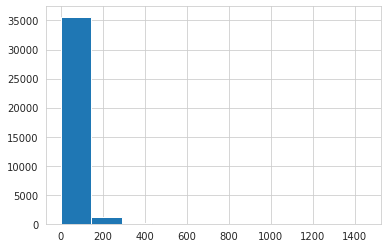

In [469]:
# To get histogram of distribution of content lengths

train.content_1.apply(lambda x: len(x)).hist()

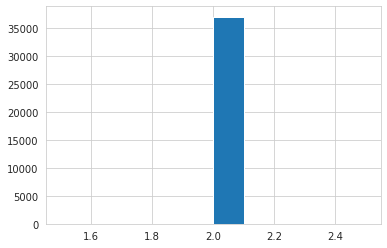

In [470]:
# To get histogram of distribution of Name lengths

train.Name_1.apply(lambda x: len(x)).hist()

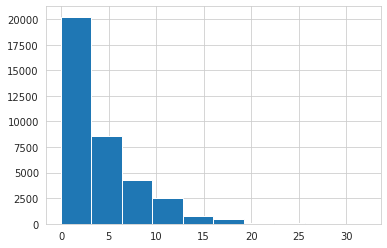

In [471]:
# To get histogram of distribution of summary lengths

train.summary_1.apply(lambda x: len(x)).hist()

##Defining the function and creating a dictionary of data

In [472]:
train.head(2)

,Name,age,gender,security_no,region_category,membership_category,avg_transaction_value,points_in_wallet,used_special_discount,past_complaint,complaint_status,feedback,churn_score,content,summary,sentiment,content_1,summary_1,Name_1
0,Merideth Mcmeen,44,0,1F2TCL3,Town,2,21027.00,500.69,0,1,3,3,5,Ordered two sets. Jacked up car and used thes...,Not stable enough for me to crawl under.,0,"[296, 96, 1582, 10276, 43, 26, 3, 48, 51, 171,...","[15, 2599, 174, 8, 78, 2, 10709, 356]","[1653, 6856]"
1,Eufemia Cardwell,37,1,VJGJ33N,City,2,25239.56,567.66,0,1,4,3,5,Very good product worked great,One Star,0,"[31, 23, 24, 92, 14]","[27, 256]","[4658, 3179]"


In [473]:
train.columns

Index(['Name', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'avg_transaction_value', 'points_in_wallet',
       'used_special_discount', 'past_complaint', 'complaint_status',
       'feedback', 'churn_score', 'content', 'summary', 'sentiment',
       'content_1', 'summary_1', 'Name_1'],
      dtype='object')

### To view all columns

In [474]:
pd.set_option('display.max_columns', None)

In [475]:
test.head()

,Name,age,gender,security_no,region_category,membership_category,avg_transaction_value,points_in_wallet,used_special_discount,past_complaint,complaint_status,feedback,churn_score,sentiment,content,summary,content_1,summary_1,Name_1
0,Evelyne Kinch,17,1,NBV1O8W,Town,0,9948.54,577.83,1,1,0,2,5,2,I just want to say that most Meguiar's product...,half of the product leaked before opening...di...,"[4, 36, 243, 2, 227, 17, 254, 386, 229, 37, 10...","[403, 11, 1, 24, 1623, 159, 1377, 449]","[1568, 4868]"
1,Franklin Lurry,22,1,C3B77NU,Town,2,19363.60,528.66,1,0,1,3,5,1,This item is misrepresented. Meguiar's no lon...,Meguiar's Gold Class Clear Coat Wax,"[7, 165, 9, 8813, 386, 50, 322, 195, 360, 596,...","[386, 1110, 583, 360, 596, 125]","[2071, 5055]"
2,Alan Branum,17,1,OCHQG0L,Village,0,48913.95,613.79,1,0,1,2,5,1,Leaves film on car after wash,One Star,"[406, 1801, 12, 26, 63, 183]","[27, 256]","[1753, 3236]"
3,Elke Yann,55,0,4KPKRVX,Town,0,30773.81,520.36,0,0,1,7,5,1,"Soap is soap regardless of manufacturer ,who c...",Give me a break,"[509, 9, 509, 2669, 11, 1098, 392, 65, 90, 475...","[313, 78, 6, 794]","[2161, 4014]"
4,Nichelle Oceguera,18,0,M0ZT1CU,City,0,28112.33,523.41,1,1,2,3,5,1,"I purchased 2 bottles, finished the first bott...",Diluted Liquid Soap!,"[4, 184, 86, 1602, 1730, 1, 123, 370, 3, 13, 1...","[7341, 847, 509]","[2258, 5152]"


In [476]:
# Defining function

def get_keras_data(dataset):
    X = {                                                    
        'name_in':     np.array(train.Name),                                                
        'gender_in':     np.array(train.gender),                                                 
        'security_no_in':     np.array(train['security_no']),
        'region_category_in':     np.array(train['region_category']),
        'membership_category_in':     np.array(train['membership_category']),
        'used_special_discount_in':     np.array(train['used_special_discount']),
        'past_complaint_in':     np.array(train['past_complaint']), 
        'feedback_in':     np.array(train.feedback), 
        'churn_score_in':     np.array(train['churn_score']), 
        'sentiment_in':     np.array(train.sentiment), 
        'num_vars_in':       np.array(train[["age", "avg_transaction_value","points_in_wallet"]])    
    }
    return X

In [477]:
# Get these datasets now:

X_train = get_keras_data(train)  # type: dict

In [478]:
# 

X_train.keys()

dict_keys(['name_in', 'gender_in', 'security_no_in', 'region_category_in', 'membership_category_in', 'used_special_discount_in', 'past_complaint_in', 'feedback_in', 'churn_score_in', 'sentiment_in', 'num_vars_in'])

In [479]:

# Printing two objects for each data of X_train

for key, value in X_train.items():
    print("\n\n============")
    print(key, ' : ', value[:2])



name_in  :  ['Merideth Mcmeen' 'Eufemia Cardwell']


gender_in  :  [0 1]


security_no_in  :  ['1F2TCL3' 'VJGJ33N']


region_category_in  :  ['Town' 'City']


membership_category_in  :  [2 2]


used_special_discount_in  :  [0 0]


past_complaint_in  :  [1 1]


feedback_in  :  [3 3]


churn_score_in  :  [5 5]


sentiment_in  :  [0 0]


num_vars_in  :  [[44 21027.0 500.69]
 [37 25239.56 567.66]]


In [480]:
# Getting subsets for X_valid and X_test:

X_test = get_keras_data(train)

In [481]:
# checking shape

print(X_train["name_in"][:4])
print("\n===========")
print(X_train["name_in"].shape)

['Merideth Mcmeen' 'Eufemia Cardwell' 'Meghan Kosak' 'Herma Torgeson']

(36988,)


In [482]:
# Inputs. 

Name =      Input(shape=(1,),                             name="Name_in")   
gender=Input(shape=(1,),     name="gender_in")
security_no=Input(shape=(1,),     name="security_no_in") 
region_category=Input(shape=(1,),     name="region_category_in")
membership_category=Input(shape=(1,),     name="membership_category_in")  
used_special_discount=Input(shape=(1,),     name="used_special_discount_in") 
past_complaint=Input(shape=(1,),     name="past_complaint_in") 
feedback=Input(shape=(1,),     name="feedback_in") 
churn_score=Input(shape=(1,),     name="churn_score_in") 
sentiment=Input(shape=(1,),     name="sentiment_in") 

num_vars =        Input(shape=(X_train["num_vars_in"].shape[1]),  name="num_vars_in")

Emdedding layer for categorical

In [483]:
# Embeddings layers.

In [484]:
emb_gender =                    Embedding(MAX_TEXT_VOC,      3  )(gender)               
emb_region_category =           Embedding(MAX_TEXT_VOC,      4  )(region_category)
emb_membership_category =       Embedding(MAX_TEXT_VOC,      6  )(membership_category)
emb_used_special_discount =     Embedding(MAX_TEXT_VOC,      2  )(used_special_discount)
emb_past_complaint =            Embedding(MAX_TEXT_VOC,      2  )(past_complaint)
emb_feedback =                  Embedding(MAX_TEXT_VOC,      9  )(feedback)
emb_churn_score =               Embedding(MAX_TEXT_VOC,      5  )(churn_score)
emb_sentiment =                 Embedding(MAX_TEXT_VOC,      5  )(sentiment)


In [485]:
# Flattening layers before concatenation

print(f"emb_gender: {emb_gender.shape}")             
print(f"emb_region_category: {emb_region_category.shape}")       
print(f"emb_membership_category: {emb_membership_category.shape}")     
print(f"emb_used_special_discount: {emb_used_special_discount.shape}")     
print(f"emb_past_complaint: {emb_past_complaint.shape}")     
print(f"emb_feedback: {emb_feedback.shape}")     
print(f"emb_churn_score: {emb_churn_score.shape}")     
print(f"emb_sentiment: {emb_sentiment.shape}")     

emb_gender: (None, 1, 3)
emb_region_category: (None, 1, 4)
emb_membership_category: (None, 1, 6)
emb_used_special_discount: (None, 1, 2)
emb_past_complaint: (None, 1, 2)
emb_feedback: (None, 1, 9)
emb_churn_score: (None, 1, 5)
emb_sentiment: (None, 1, 5)


In [486]:
# Concatenating all layer-branches:

main_l = concatenate(
                        [
                          Flatten() (emb_gender),
                          Flatten() (emb_region_category),
                          Flatten() (emb_membership_category),
                          Flatten() (emb_used_special_discount),
                          Flatten() (emb_past_complaint),
                          Flatten() (emb_feedback),
                          Flatten() (emb_churn_score),
                          Flatten() (emb_sentiment),
                          num_vars          
                        ]
                      )

In [487]:
#Level of dropouts:
dr_r = 0.1   

# Adding classification layer
main_l = Dense(128) (main_l)
main_l = Dropout(dr_r)(main_l)
main_l = Dense(64) (main_l)
main_l = Dropout(dr_r) (main_l)

In [488]:
# Output neuron
output = Dense(2, activation="sigmoid") (main_l)

In [489]:
# Formulating Model 
model = Model(
              inputs= [                     
                        gender,
                        region_category,
                        membership_category,
                        used_special_discount,
                        past_complaint,
                        feedback,
                        churn_score,
                        sentiment,
                        num_vars
                       ],
              outputs= output
              )

In [490]:
# Compiling model
model.compile(loss="mse",
              optimizer="adam",
              metrics=["mae"]    # Not using rmsle_cust
              )

In [491]:
# To show model summary    
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 gender_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 region_category_in (InputLayer  [(None, 1)]         0           []                               
 )                                                                                                
                                                                                                  
 membership_category_in (InputL  [(None, 1)]         0           []                               
 ayer)                                                                                            
                                                                                            

In [492]:
# Plot the model architecture
plt.figure(figsize = (14,14));
plot_model(model, to_file = "model.png");


<Figure size 1008x1008 with 0 Axes>

In [493]:
# Some constants
BATCH_SIZE = 20000
epochs = 5

In [494]:
# Observing our training data once more:

for key, value in X_train.items():
    print("\n\n============")
    print(key, ' : ', value[:2])



name_in  :  ['Merideth Mcmeen' 'Eufemia Cardwell']


gender_in  :  [0 1]


security_no_in  :  ['1F2TCL3' 'VJGJ33N']


region_category_in  :  ['Town' 'City']


membership_category_in  :  [2 2]


used_special_discount_in  :  [0 0]


past_complaint_in  :  [1 1]


feedback_in  :  [3 3]


churn_score_in  :  [5 5]


sentiment_in  :  [0 0]


num_vars_in  :  [[44 21027.0 500.69]
 [37 25239.56 567.66]]


In [496]:
# 26.4

start = time.time()
history= model.fit(X_train,
                   X_test['churn_score'],
                   epochs=epochs,
                   batch_size=BATCH_SIZE,
                   validation_data=(X_valid, valid.target),
                   #callbacks = callbacks,
                   verbose=1
                  )

end = time.time()
print((end-start)/60)    

KeyError: ignored